In [1]:
import pandas as pd
import numpy as np
import torch
import matplotlib.pyplot as plt
from fill_NaNval import Filler 
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings("ignore")

In [2]:
Data1 = pd.read_csv("prof_data.csv")
Data1.head()

,sessionId,timestamp,x,y,z,ppgValue,hr,hrIbi,hrStatus,ibiStatus,notification,engagement,affect,context
0,1,8,653.0,195.0,4324.0,1917829.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,50,659.0,198.0,4096.0,1917495.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,89,645.0,149.0,4054.0,1917365.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,128,752.0,213.0,4090.0,1918146.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,169,652.0,232.0,4088.0,1919319.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
ppg_filler = Filler()
Data1 = ppg_filler.fill_all_Id(Data1, deg_ppg= 3, deg_hr= 6, deg_hrIbi= 2, deg_x=1, deg_y=1, deg_z= 1)

filling the missing values of ppg with a 3 degree polynomial
done
filling the missing values of hr with a 6 degree polynomial
done
filling the missing values of hrIbi with a 2 degree polynomial
done
filling the missing values of x with a 1 degree polynomial
done
filling the missing values of y with a 1 degree polynomial
done
filling the missing values of z with a 1 degree polynomial
done


In [4]:
clean_data = ppg_filler.fill_hrStatus_val(Data1)
clean_data.tail()

filling the missing values og hr_satus with a logistic regression
The accuracy of our predictor is: 0.986658769526912


,sessionId,timestamp,x,y,z,ppgValue,hr,hrIbi,hrStatus,ibiStatus,affect,context,ppg_filled,hr_filled,hrIbi_filled,x_filled,y_filled,z_filled,hr_status_filled
8824672,48,4225415,-950.0,-146.0,3535.0,3360408.0,NaN,NaN,NaN,NaN,NaN,NaN,3360408.0,6.096061,480.818830,-950.0,-146.0,3535.0,-10.0
8824674,48,4225455,-808.0,42.0,4038.0,3349663.0,NaN,NaN,NaN,NaN,NaN,NaN,3349663.0,6.083595,480.817765,-808.0,42.0,4038.0,-10.0
8824675,48,4225495,-792.0,-89.0,3885.0,3404833.0,NaN,NaN,NaN,NaN,NaN,NaN,3404833.0,6.071127,480.816701,-792.0,-89.0,3885.0,-10.0
8824676,48,4225535,-806.0,-78.0,4130.0,3316474.0,NaN,NaN,NaN,NaN,NaN,NaN,3316474.0,6.058658,480.815636,-806.0,-78.0,4130.0,-10.0
8824677,48,4225576,-823.0,-124.0,3964.0,3314477.0,NaN,NaN,NaN,NaN,NaN,NaN,3314477.0,6.045875,480.814545,-823.0,-124.0,3964.0,-10.0


In [22]:
Data2 = pd.read_csv("SessionData-all.csv")
Data2 = Data2.rename(columns={"id":"sessionId"})
full_data = pd.merge(clean_data, Data2[["sessionId","age","gender","fairNumber"]], on="sessionId")
#Drop the already interplated values
full_data.drop(["x","y","z","ppgValue","hr","hrIbi","ibiStatus","hrStatus"],axis=1,inplace=True)

In [23]:
full_data.head()

,sessionId,timestamp,affect,context,ppg_filled,hr_filled,hrIbi_filled,x_filled,y_filled,z_filled,hr_status_filled,age,gender,fairNumber
0,1,611,NaN,NaN,2.016958e+06,90.0,691.0,700.796918,-3032.481111,873.251724,1.0,18-25,female,1
1,1,1611,NaN,NaN,2.017010e+06,90.0,676.0,700.756025,-3032.284900,873.566243,1.0,18-25,female,1
2,1,2612,NaN,NaN,2.017061e+06,89.0,665.0,700.715090,-3032.088492,873.881076,1.0,18-25,female,1
3,1,3613,NaN,NaN,2.017112e+06,89.0,689.0,700.674156,-3031.892085,874.195909,1.0,18-25,female,1
4,1,4618,NaN,NaN,2.017163e+06,89.0,689.0,700.633059,-3031.694892,874.512000,1.0,18-25,female,1


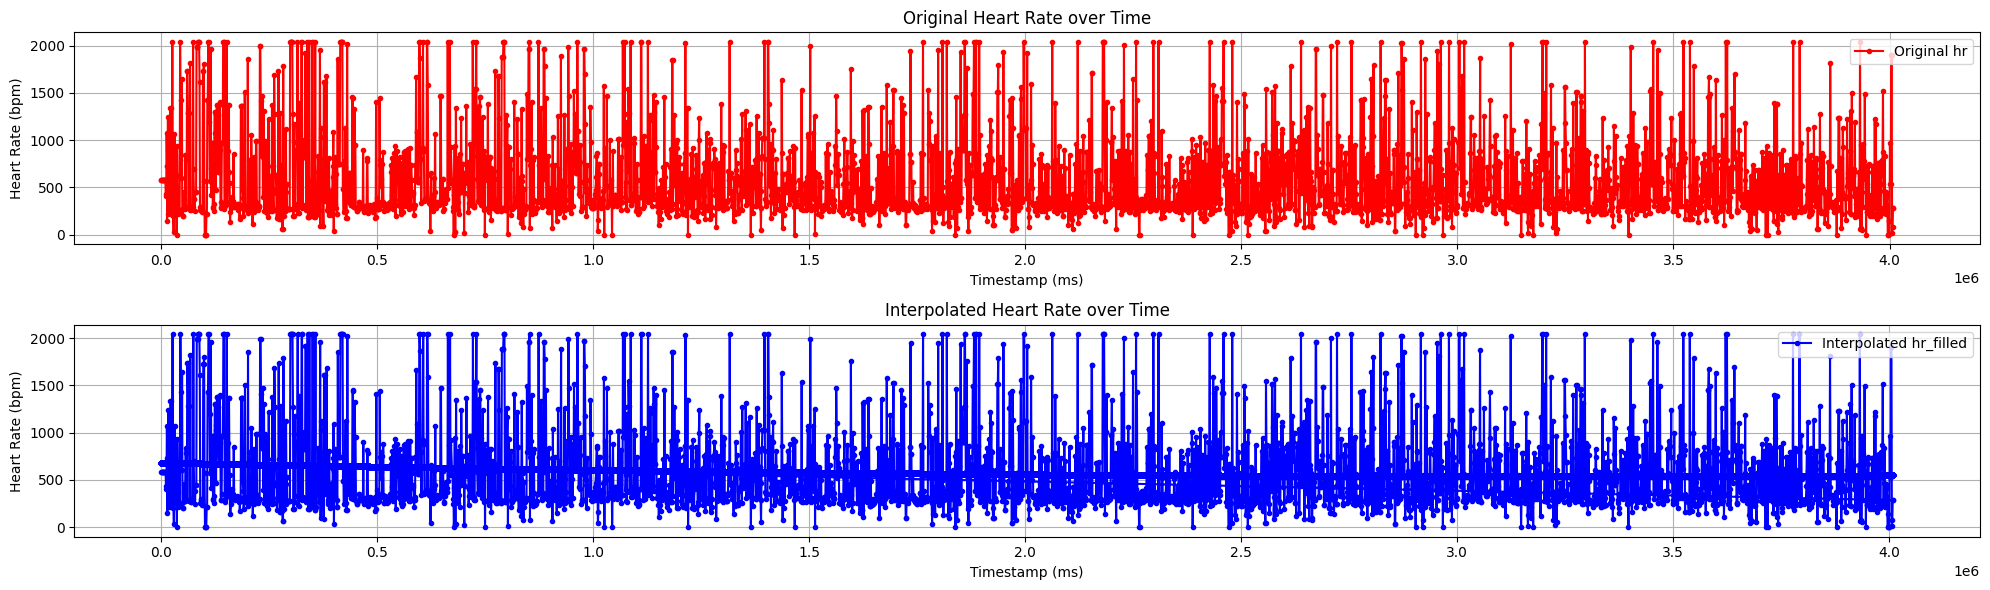

In [6]:
#hr value test.
Data1 = clean_data.copy()
df =  Data1[Data1['sessionId'] == 15]

plt.figure(figsize=(20, 6))
plt.subplot(2, 1, 1)
plt.plot(df['timestamp'], df['hrIbi'], marker='.', linestyle='-', color='red', label='Original hr')
plt.title('Original Heart Rate over Time')
plt.xlabel('Timestamp (ms)')
plt.ylabel('Heart Rate (bpm)')
plt.grid(True)
plt.legend()

# Create the second subplot for the interpolated 'ppg_filled'
plt.subplot(2, 1, 2)
plt.plot(df['timestamp'], df['hrIbi_filled'], marker='.', linestyle='-', color='blue', label='Interpolated hr_filled')
plt.title('Interpolated Heart Rate over Time')
plt.xlabel('Timestamp (ms)')
plt.ylabel('Heart Rate (bpm)')
plt.grid(True)
plt.legend()

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Assuming df is your DataFrame containing 'hr' and 'hr_status' columns
# Map numeric values to classes
class_mapping = {1.0: 'Class1', -10.0: 'Class2', 0.0: 'Class3', -3.0: 'Class4',
                 -99.0: 'Class5', -999.0: 'Class6', -1.0: 'Class7', -11.0: 'Class8'}

# Replace numeric values with corresponding classes
df['hr_status_class'] = df['hrStatus'].map(class_mapping)

# Split data into complete and incomplete observations
complete_data = df.dropna(subset=['hr_filled', 'hr_status_class'])
incomplete_data = df[df['hr_status_class'].isna()]

# Prepare data for classification
X = complete_data[['hr_filled']]
y = complete_data['hr_status_class']

# Train logistic regression model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict missing 'hr_status' values
incomplete_data['hr_status_class_imputed'] = model.predict(incomplete_data[['hr_filled']])

# Map predicted classes back to numeric values
class_mapping_reverse = {v: k for k, v in class_mapping.items()}
incomplete_data['hr_status_imputed'] = incomplete_data['hr_status_class_imputed'].map(class_mapping_reverse)


# Compute accuracy of the predictor
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of the predictor:", accuracy)

merged = pd.concat([complete_data, incomplete_data])
merged.drop(["hr_status_class","hr_status_class_imputed","notification","engagement"],axis=1,inplace=True)
merged['hr_status_imputed'] = merged['hr_status_imputed'].fillna(merged['hrStatus'])
merged

# Check imputed data
df.head()

Accuracy of the predictor: 0.986658769526912


,sessionId,timestamp,x,y,z,ppgValue,hr,hrIbi,hrStatus,ibiStatus,notification,engagement,affect,context,ppg_filled,hr_filled,hr_status_class
0,1,8,653.0,195.0,4324.0,1917829.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1917829.0,68.000676,NaN
1,1,50,659.0,198.0,4096.0,1917495.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1917495.0,67.998497,NaN
2,1,89,645.0,149.0,4054.0,1917365.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1917365.0,67.996474,NaN
3,1,128,752.0,213.0,4090.0,1918146.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1918146.0,67.994452,NaN
4,1,169,652.0,232.0,4088.0,1919319.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1919319.0,67.992326,NaN


In [13]:
clean_data[clean_data["ibiStatus"]==0&clean_data["hrIbi"].notna()]

,sessionId,timestamp,x,y,z,ppgValue,hr,hrIbi,hrStatus,ibiStatus,affect,context,ppg_filled,hr_filled,hrIbi_filled,x_filled,y_filled,z_filled,hr_status_imputed
16,1,611,NaN,NaN,NaN,NaN,90.0,691.0,1.0,0.0,NaN,NaN,2.016958e+06,90.0,691.0,700.796918,-3032.481111,873.251724,1.0
41,1,1611,NaN,NaN,NaN,NaN,90.0,676.0,1.0,0.0,NaN,NaN,2.017010e+06,90.0,676.0,700.756025,-3032.284900,873.566243,1.0
67,1,2612,NaN,NaN,NaN,NaN,89.0,665.0,1.0,0.0,NaN,NaN,2.017061e+06,89.0,665.0,700.715090,-3032.088492,873.881076,1.0
93,1,3613,NaN,NaN,NaN,NaN,89.0,689.0,1.0,0.0,NaN,NaN,2.017112e+06,89.0,689.0,700.674156,-3031.892085,874.195909,1.0
120,1,4618,NaN,NaN,NaN,NaN,89.0,689.0,1.0,0.0,NaN,NaN,2.017163e+06,89.0,689.0,700.633059,-3031.694892,874.512000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8824569,48,4221416,NaN,NaN,NaN,NaN,0.0,404.0,-10.0,0.0,NaN,NaN,2.372791e+06,0.0,404.0,-1148.784928,-2298.691898,1572.639326,-10.0
8824595,48,4222416,NaN,NaN,NaN,NaN,0.0,213.0,-10.0,0.0,NaN,NaN,2.373604e+06,0.0,213.0,-1148.931609,-2298.573146,1572.974467,-10.0
8824621,48,4223419,NaN,NaN,NaN,NaN,0.0,478.0,-10.0,0.0,NaN,NaN,2.374421e+06,0.0,478.0,-1149.078729,-2298.454039,1573.310613,-10.0
8824647,48,4224422,NaN,NaN,NaN,NaN,0.0,0.0,-10.0,0.0,NaN,NaN,2.375239e+06,0.0,0.0,-1149.225849,-2298.334931,1573.646759,-10.0


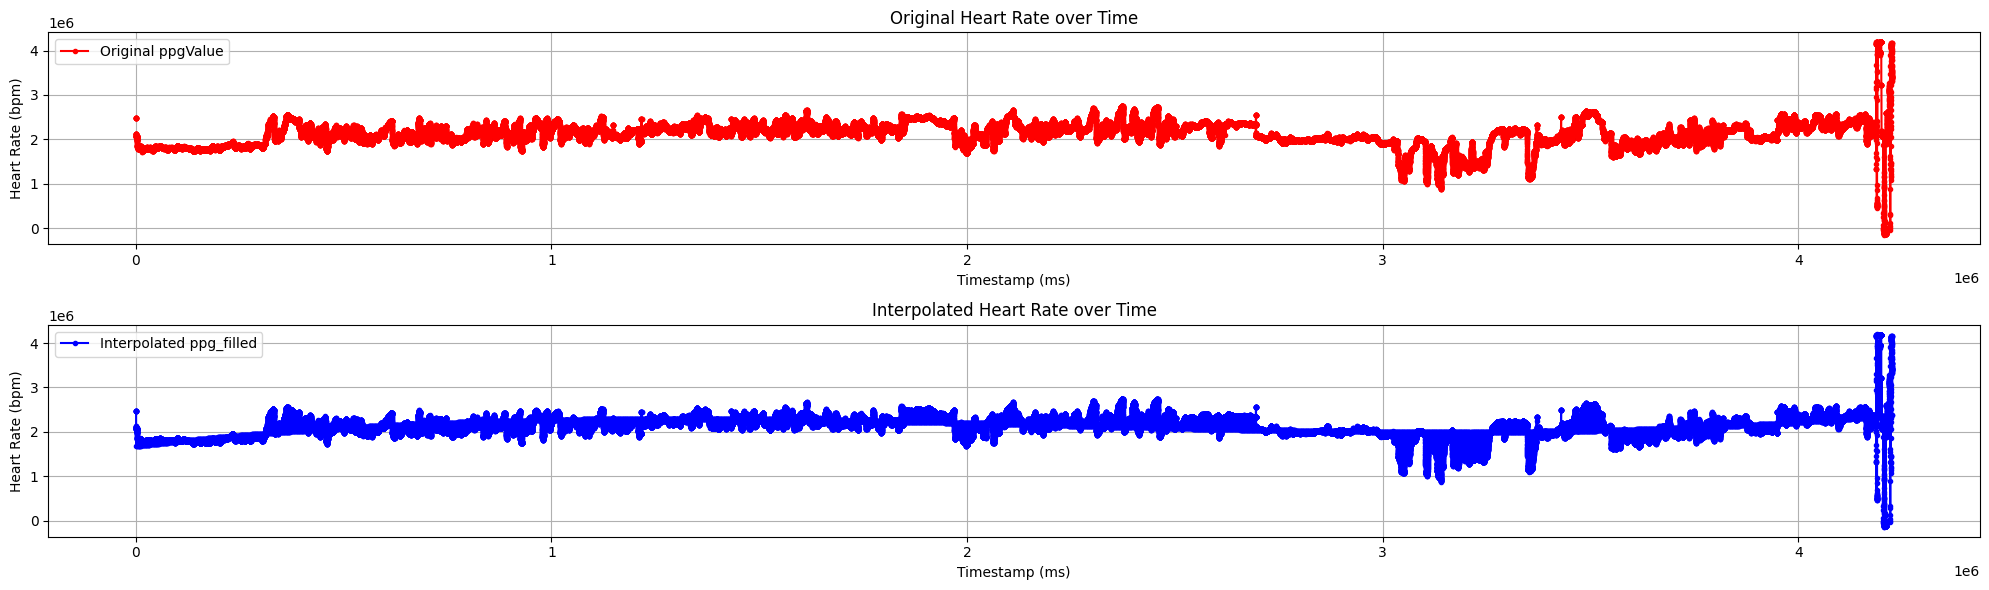

In [322]:
#PPGvalue test.
df =  Data1[Data1['sessionId'] == 8]

plt.figure(figsize=(20, 6))
plt.subplot(2, 1, 1)
plt.plot(df['timestamp'], df['ppgValue'], marker='.', linestyle='-', color='red', label='Original ppgValue')
plt.title('Original Heart Rate over Time')
plt.xlabel('Timestamp (ms)')
plt.ylabel('Heart Rate (bpm)')
plt.grid(True)
plt.legend()

# Create the second subplot for the interpolated 'ppg_filled'
plt.subplot(2, 1, 2)
plt.plot(df['timestamp'], df['ppg_filled'], marker='.', linestyle='-', color='blue', label='Interpolated ppg_filled')
plt.title('Interpolated Heart Rate over Time')
plt.xlabel('Timestamp (ms)')
plt.ylabel('Heart Rate (bpm)')
plt.grid(True)
plt.legend()

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


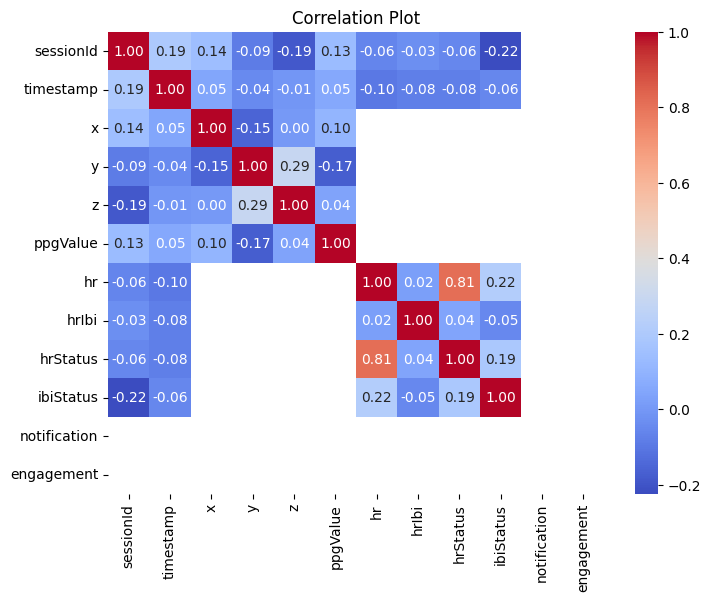

In [126]:
import seaborn as sns
correlation_matrix = Data1.drop(Data1.columns[-2:], axis=1).corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Plot')
plt.show()

In [14]:
Data2 = pd.read_csv("SessionData-all.csv")
Data2.head()

,id,duration,watchId,age,gender,fairNumber
0,1,8021351,0Q3V,18-25,female,1
1,2,3752526,0Q3V,26-30,male,1
2,3,3989497,0QED,18-25,male,1
3,4,4979198,0QED,18-25,male,1
4,5,4836199,0QVM,18-25,male,1
